<a href="https://colab.research.google.com/github/geniuschinchillas/ChinchillasSnack/blob/master/Supervised%20Learning/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.datasets import samples_generator as sg

In [0]:
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split

In [12]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


**Linear Models**

Linear models for regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.datasets.samples_generator import make_regression

In [0]:
X, y, coef = make_regression(n_samples=60, n_features=1, n_informative=1, 
                            noise=10, coef=True, random_state=0)

In [16]:
print(X.shape)
print(coef)

(60, 1)
29.614019752214492


In [17]:
print(y)

[ 13.96420455   3.23554172 -18.58442304  42.49774253  29.84594154
   0.69334246 -56.58651801  20.06023862 -10.95037945 -40.22135965
  18.52370062  47.66156114 -11.2760963  -27.87425514  -6.71565213
  -7.67079125  48.70440245  61.50390984  -1.45013971 -11.02944183
  66.51098598  11.14407485 -23.73067717  14.15407657   4.44278877
  34.61134638 -41.51899017 -21.73900887   7.41492379 -47.80245657
 -21.95630211  30.09349139   8.65283141   9.77154116   6.07658361
 -41.74827997  -2.21321423 -21.37190545   3.56961894  14.02909127
  65.0340129   37.65539089   8.3474392   -9.59368526 -37.02801674
 -34.34106968   2.6559067   22.23414768  11.09662376  20.93332858
  54.4669501   35.624909   -17.88751974   2.20149974 -57.16737553
 -33.46260412  47.95114903 -16.55491754  45.00041122 -18.20688346]


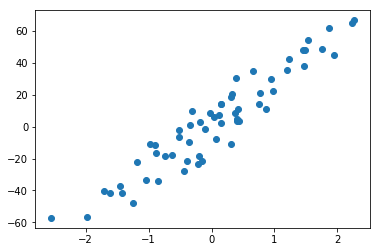

In [18]:
plt.scatter(X, y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)

(45, 1)
(45,)


In [0]:
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [27.834947]
lr.intercept_: -0.4937913942790093


In [23]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.81


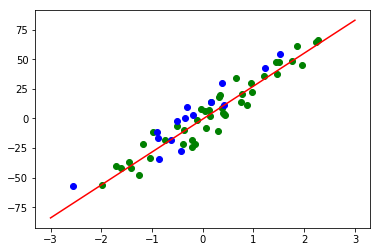

In [24]:
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_test, y_test, c='b')
#plt.scatter(X_test, lr.predict(X_test), c='r')
line = np.linspace(-3, 3, 1000).reshape(-1,1)
plt.plot(line, lr.predict(line), c='r')

In [0]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [0]:
boston = load_boston()
X = boston.data

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y = boston.target

In [27]:
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Linear Regression Solve Directly

>The first approach is to attempt to solve the regression problem directly.

>That is, given X, what are the set of coefficients b that when multiplied by X will give y. As we saw in a previous section, the normal equations define how to calculate b directly.

>```b = (X^T . X)^-1 . X^T . y```

>This can be calculated directly in NumPy using the inv() function for calculating the matrix inverse.

>```b = inv(X.T.dot(X)).dot(X.T).dot(y)```

>Once the coefficients are calculated, we can use them to predict outcomes given X.

In [0]:
from numpy import array
from numpy.linalg import inv

In [32]:
data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.5, 0.49]
])
print(data)

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


In [33]:
X, y =data[:,0], data[:,1]
print(X)
print("X shape: ", X.shape)
print(y)

[0.05 0.18 0.31 0.42 0.5 ]
X shape:  (5,)
[0.12 0.22 0.35 0.38 0.49]


In [34]:
X = X.reshape((len(X), 1))
print(X)
print("X shape: ", X.shape)

[[0.05]
 [0.18]
 [0.31]
 [0.42]
 [0.5 ]]
X shape:  (5, 1)


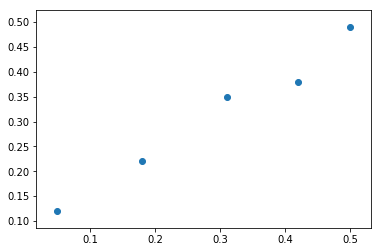

In [35]:
plt.scatter(X, y)
plt.show()

In [36]:
print(X)
print(X.T)
print(X.T.dot(X))
print(inv(X.T.dot(X)))
print(inv(X.T.dot(X)).dot(X.T))
print(inv(X.T.dot(X)).dot(X.T).dot(y))

[[0.05]
 [0.18]
 [0.31]
 [0.42]
 [0.5 ]]
[[0.05 0.18 0.31 0.42 0.5 ]]
[[0.5574]]
[[1.79404377]]
[[0.08970219 0.32292788 0.55615357 0.75349839 0.89702189]]
[1.00233226]


In [37]:
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[1.00233226]


In [38]:
yhat = X.dot(b)
print(yhat)

[0.05011661 0.18041981 0.310723   0.42097955 0.50116613]


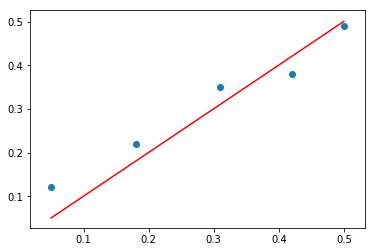

In [39]:
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

In [40]:
a = np.array([[1., 2.], [3., 4.]])
ainv = inv(a)
print(ainv)

[[-2.   1. ]
 [ 1.5 -0.5]]


Linear Regression solve via QR Decomposition

>The QR decomposition is an approach of breaking a matrix down into its constituent elements.

>```A = Q . R```


>Where A is the matrix that we wish to decompose, Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.

>The QR decomposition is a popular approach for solving the linear least squares equation.

>Stepping over all of the derivation, the coefficients can be found using the Q and R elements as follows:

>```b = R^-1 . Q.T . y```


>The approach still involves a matrix inversion, but in this case only on the simpler R matrix.

In [0]:
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot

In [0]:
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49],
])

In [0]:
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))

In [44]:
Q, R = qr(X)
print(Q)
print('\n')
print(R)

[[-0.06697096]
 [-0.24109545]
 [-0.41521995]
 [-0.56255606]
 [-0.6697096 ]]


[[-0.74659226]]


In [45]:
b = inv(R).dot(Q.T).dot(y)
print(b)

[1.00233226]


In [0]:
yhat = X.dot(b)

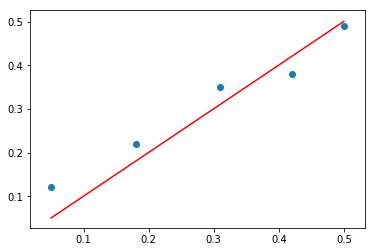

In [47]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Linear Regression solve via Singular-Value Decomposition

> The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like the QR decomposition.

> ```X = U . Sigma . V^*  ```

> Where X is the real n x m matrix that we wish to decompose, U is a m x m matrix, Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, and V^* is the conjugate transpose of an n x n matrix where * is a superscript.

> Unlike the QR decomposition, all matrices have an SVD decomposition. As a basis for solving the system of linear equations for linear regression, SVD is more stable and the preferred approach.

> Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix X and multiplying that by the output vector y.

> ``` b = X^+ . y ```

>Where the pseudoinverse is calculated as following:

>``` X^+ = U . D^+ . V^T ```

> Where X^+ is the pseudoinverse of X and the + is a superscript, D^+ is the pseudoinverse of the diagonal matrix Sigma and V^T is the transpose of V^*.

> We can get U and V from the SVD operation. D^+ can be calculated by creating a diagonal matrix from Sigma and calculating the reciprocal of each non-zero element in Sigma.


In [0]:
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot

In [0]:
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])

In [0]:
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))

In [51]:
b = pinv(X).dot(y)
print(b)

[1.00233226]


In [0]:
yhat = X.dot(b)

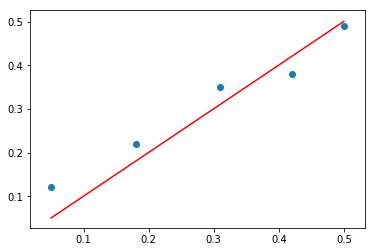

In [53]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Ridge regression

In [0]:
from sklearn.linear_model import Ridge

In [55]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [56]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [57]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


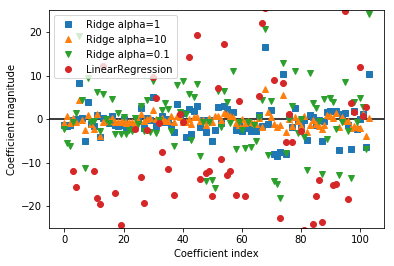

In [58]:
plt.plot(ridge.coef_, 's',label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [0]:
from sklearn.datasets import load_boston


In [61]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
#print(boston_df.info)
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [62]:
boston_df['Price'] = boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [0]:
newX = boston_df.drop('Price', axis=1)
newY = boston_df['Price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY, 
                                                    test_size=0.3,
                                                    random_state=3)
print(len(X_test))
print(len(y_test))

152
152


In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

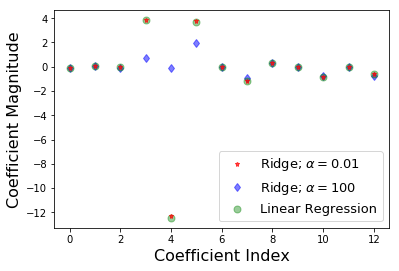

In [68]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',
         zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',
         markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Lasso

In [0]:
from sklearn.linear_model import Lasso

In [34]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Training set score: 0.90
Test set score: 0.77
Number of features used: 33 

Training set score: 0.94
Test set score: 0.74
Number of features used: 67 

Training set score: 0.95
Test set score: 0.64
Number of features used: 96 



Text(0, 0.5, 'Coefficient magnitude')

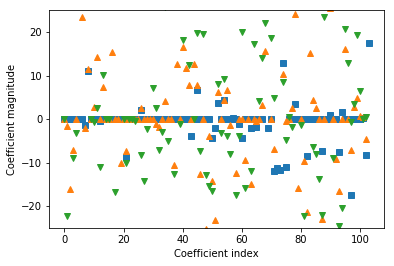

In [35]:
alphas = [0.01, 0.001, 0.0001]
symbols = ['s', '^', 'v']
for alpha, symbol in zip(alphas, symbols):
    lasso = Lasso(alpha = alpha, max_iter=100000).fit(X_train, y_train)
    print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
    print("Number of features used:", np.sum(lasso.coef_ != 0), '\n')
    
    plt.plot(lasso.coef_, symbol)
    
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [0]:
import math

In [0]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [0]:
X = cancer.data
Y = cancer.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,
                                                   random_state=31)

In [0]:
lasso = Lasso()
lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used = np.sum(lasso.coef_ != 0)

In [76]:
print("training score: ", train_score)
print("test score: ", test_score)
print("number of feature used: ", coeff_used)

training score:  0.5600974529893081
test score:  0.5832244618818156
number of feature used:  4


In [78]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha =0.01: 10


In [80]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7754092006936699
test score for alpha =0.0001:  0.7318608210757908
number of features used: for alpha =0.0001: 22


In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.7842206194055068
LR test score:  0.7329325010888672


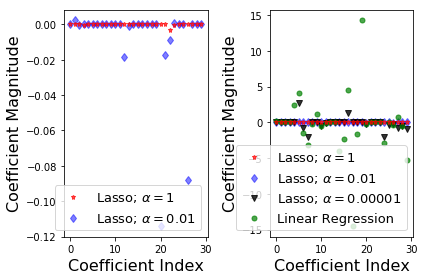

In [83]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Linear models for classification

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [0]:
from sklearn.datasets.samples_generator import make_blobs

(30, 2)


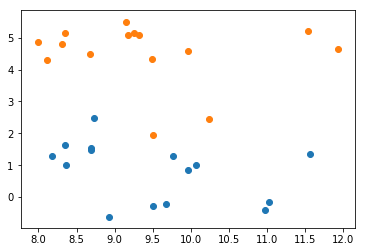

In [38]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)
print(X.shape)
blues = y == 0
reds = y == 1
plt.scatter(X[blues,0], X[blues, 1])
plt.scatter(X[reds,0], X[reds, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


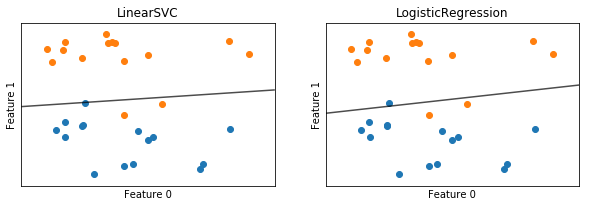

In [39]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                 ax=ax, alpha=0.7)
  
  ax.scatter(X[blues,0], X[blues,1])
  ax.scatter(X[reds,0],X[reds,1])
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=42)

Training set score: 0.958
Test set score: 0.958 

Training set score: 0.981
Test set score: 0.965 

Training set score: 0.967
Test set score: 0.965 



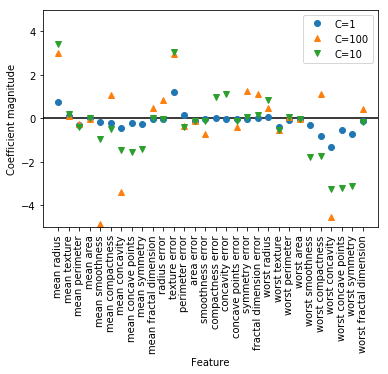

In [42]:
chs = [1,100,10,0.01]
symbols = ['o', '^', 'v']
for ch, symbols in zip(chs, symbols):
    label = "C=" + str(ch)
    logreg = LogisticRegression(solver='lbfgs', max_iter=100000, C=ch).fit(X_train, y_train)
    print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)), '\n')
    
    plt.plot(logreg.coef_.T, symbols, label=label)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Linear models for multiclass classification

In [0]:
from sklearn.datasets import make_blobs

(100, 2)     (100,)
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


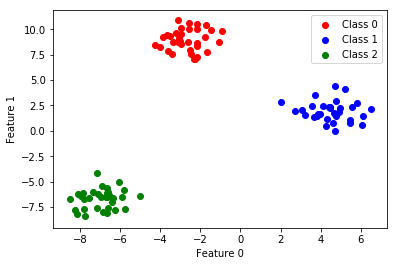

In [44]:
X, y = make_blobs(random_state=42)
print(X.shape,'   ',y.shape)
print(y)
c1 = y == 0
c2 = y == 1
c3 = y == 2
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [46]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492439  0.23140982]
 [ 0.47621688 -0.06936534]
 [-0.18914212 -0.20399675]]
[-1.07745566  0.13140703 -0.08604813]


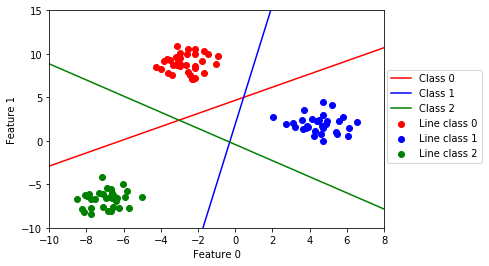

In [47]:
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r','b','g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

```
y = a*x - b
a = -W[0]/W[1]
b = I[0]/W[1]
```

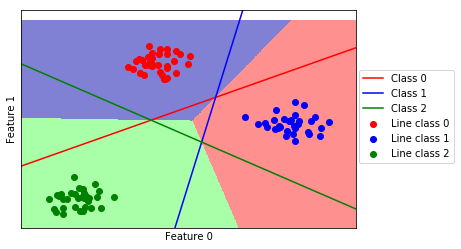

In [48]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.5)
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r','b','g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))